# Importing Packages

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Importing the Dataset

In [24]:
df = pd.read_csv(r"walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Analyzing the Dataset

In [25]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Drop Duplicate Rows 

In [26]:
df.drop_duplicates() 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


Detect Missing Values

In [27]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Outlier Detection using IQR

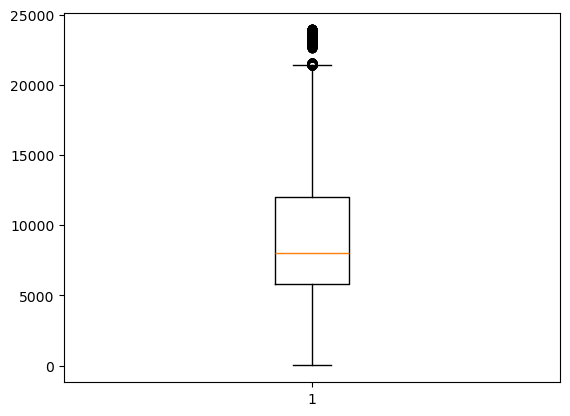

In [28]:
# Check there is Any Outlier
plt.boxplot(df["Purchase"])
plt.show()

In [29]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identify the outlier rows
outliers = df[(df['Purchase'] < lower_fence) | (df['Purchase'] > upper_fence)]
outliers


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [30]:
# Drop that Outlier Rows
df_2 = df.drop(outliers.index)

In [31]:
df_2.info()  # No.of.Rows reduced 550068 to 547391

<class 'pandas.core.frame.DataFrame'>
Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     547391 non-null  int64 
 1   Product_ID                  547391 non-null  object
 2   Gender                      547391 non-null  object
 3   Age                         547391 non-null  object
 4   Occupation                  547391 non-null  int64 
 5   City_Category               547391 non-null  object
 6   Stay_In_Current_City_Years  547391 non-null  object
 7   Marital_Status              547391 non-null  int64 
 8   Product_Category            547391 non-null  int64 
 9   Purchase                    547391 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 45.9+ MB


In [45]:
df_2.to_csv("walmart_cleaned.csv")   # Export Cleaned dataset 

<function matplotlib.pyplot.show(close=None, block=None)>

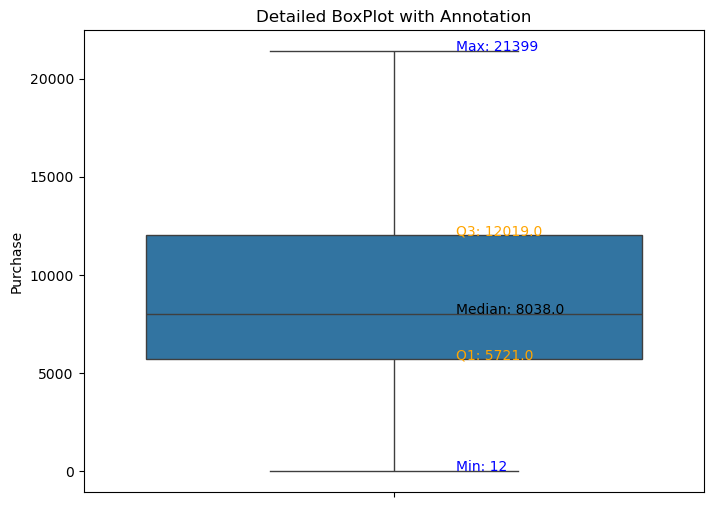

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_2, y="Purchase")


# Remaining Statistics 
Q1 = df_2['Purchase'].quantile(0.25)
Q3 = df_2['Purchase'].quantile(0.75)
IQR = Q3 - Q1
min_value = df_2["Purchase"].min()
median_value = df_2["Purchase"].median()
max_value = df_2["Purchase"].max()

# Add Text Annotation 
plt.text(0.1, min_value, f'Min: {min_value}', horizontalalignment ="left", color="Blue")
plt.text(0.1, max_value, f'Max: {max_value}', horizontalalignment="left", color ="Blue")
plt.text(0.1, median_value, f'Median: {median_value}', horizontalalignment='left', color='Black')
plt.text(0.1, Q1, f'Q1: {Q1}', horizontalalignment='left', color='orange')
plt.text(0.1, Q3, f'Q3: {Q3}', horizontalalignment='left', color='orange')

# Show the plt
plt.title("Detailed BoxPlot with Annotation")
plt.show

# Exploratory Data Analysis (EDA)

Statistical Summary

In [34]:
df_2.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.473910e+05,547391.000000,547391.000000,547391.000000,547391.000000
mean,1.003028e+06,8.074627,0.409486,5.378945,9195.627195
std,1.727357e+03,6.521586,0.491739,3.927383,4938.872953
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5721.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,8038.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12019.000000
max,1.006040e+06,20.000000,1.000000,20.000000,21399.000000


Correlation Analysis

In [35]:
Correlation = df_2[["Occupation", "Marital_Status", "Product_Category", "Purchase"]].corr() 
Correlation

,Occupation,Marital_Status,Product_Category,Purchase
Occupation,1.000000,0.024128,-0.008180,0.020428
Marital_Status,0.024128,1.000000,0.019591,-0.001448
Product_Category,-0.008180,0.019591,1.000000,-0.370128
Purchase,0.020428,-0.001448,-0.370128,1.000000


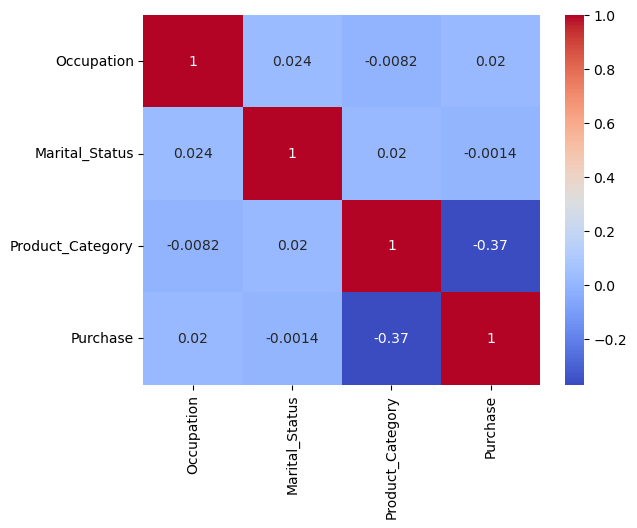

In [36]:
# Generate a heatmap for the correlation matrix
sns.heatmap(Correlation, annot=True, cmap='coolwarm')
plt.show()


Age and Gender Insights: Product Category Purchase Patterns

In [37]:
Age_PrCategory = df.groupby(["Age","Gender", "Product_Category"]).size().unstack().fillna(0)
print("Age and Gender Insights: Product Category Purchase Patterns")
Age_PrCategory


Age and Gender Insights: Product Category Purchase Patterns


Product_Category     1     2     3     4      5     6     7      8    9   \
Age   Gender                                                               
0-17  F             765   366   506   390   1511    89     8    860    5   
      M            2820   439   694   368   2819   310    45   1398   11   
18-25 F            4640  1154  1514   778   7928   770   102   5205   12   
      M           22322  3274  3196  1685  20594  2979   379  12706   51   
26-35 F            9384  1847  1910  1157  16586  1753   396  12709   23   
      M           48865  7081  5752  3035  44887  6732  1255  31547  131   
36-45 F            5273  1193  1178   706   7817   972   216   6588   17   
      M           22375  3719  2676  1648  21560  2927   593  16708   90   
46-50 F            2492   521   449   313   3756   442   103   3550    6   
      M            7982  1584   927   677   8215  1180   224   7106   27   
51-55 F            1589   393   301   207   2989   355    84   2868    5   
      M            7460  1388   623   471   6904  1095   182   6472   24   
55+   F             688   184   148    88   1374   178    34   1778    2   
      M            3723   721   339   230   3993   684   100   4430    6   

Product_Category    10    11   12    13   14    15    16   17   18   19   20  
Age   Gender                                                                  
0-17  F             29   240   85    35   24    42    61    2    8   25   32  
      M             82   500   40    77   15   118   168    4   19   34   58  
18-25 F            119  1047  217   203   92   171   420    8   46   73  129  
      M            484  3550  222   553  138   853  1178   33  293  202  340  
26-35 F            364  1670  411   497  235   362   954    5  105  149  235  
      M           1423  8204  685  1599  329  2010  3164  122  937  414  663  
36-45 F            282  1013  353   350  129   229   504   23   85   95  147  
      M            953  3940  641   900  183  1166  1451  112  617  225  359  
46-50 F            136   444  201   158   56   122   249    8   69   50   74  
      M            384  1660  319   393   93   480   630   87  282   99  153  
51-55 F            132   233  152   146   63    82   159    7   34   33   62  
      M            387  1225  281   337   91   426   513  100  389  101  138  
55+   F            100    92  113    73   24    38    55    9   35   26   44  
      M            250   469  227   228   51   191   322   58  206   77  116

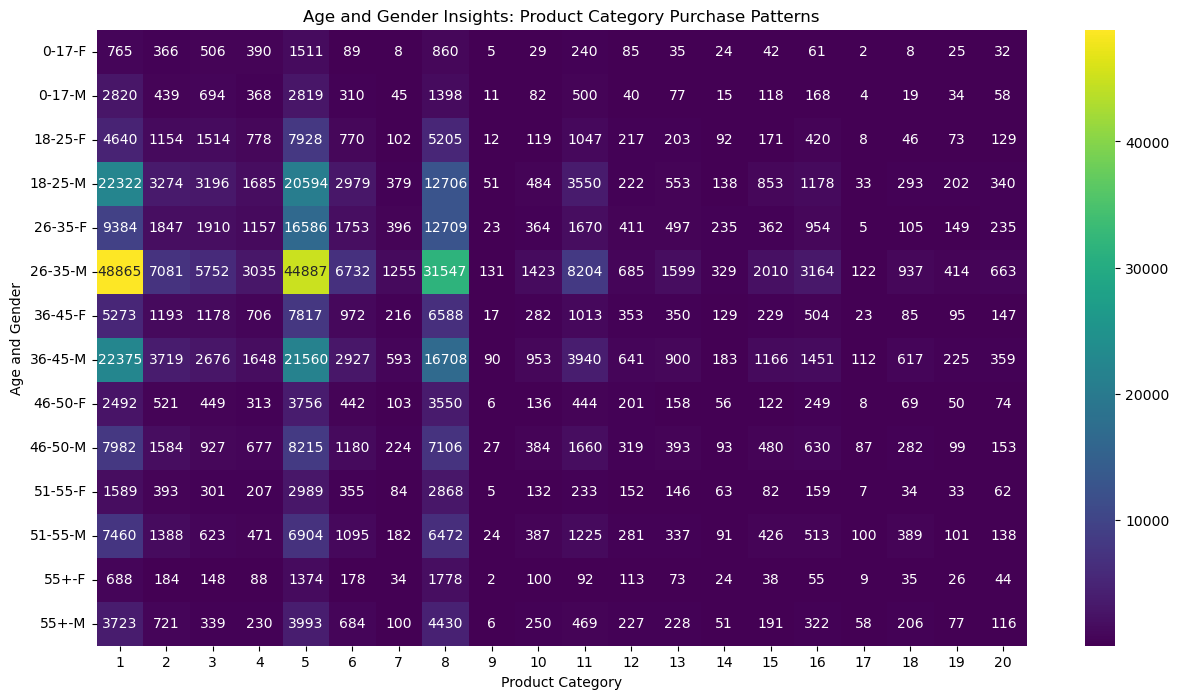

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(Age_PrCategory, cmap="viridis", annot=True, fmt=".0f")

plt.xlabel("Product Category")
plt.ylabel("Age and Gender")
plt.title("Age and Gender Insights: Product Category Purchase Patterns")

plt.show()

Top 10 Proudcts_Category

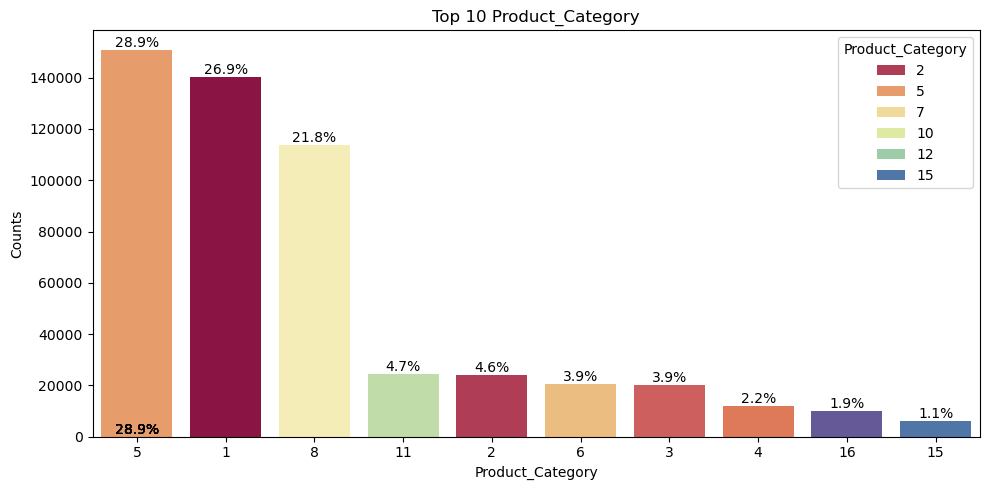

In [39]:
# Top 10 Product_Category
top_product_cat = df_2["Product_Category"].value_counts().head(10).index
df_2_Product_cat = df_2[df_2["Product_Category"].isin(top_product_cat)]

# Seaborn Pattern
plt.figure(figsize=(10,5))
pattern = sns.countplot(x="Product_Category", data=df_2_Product_cat,hue="Product_Category", palette="Spectral", order=top_product_cat)

# Title and Labels 
pattern.set_title("Top 10 Product_Category")
pattern.set_xlabel("Product_Category")
pattern.set_ylabel("Counts")

# Calculate percentages
total = df_2_Product_cat["Product_Category"].count()
counts = df_2_Product_cat["Product_Category"].value_counts()
percentages = (counts / total * 100).round(2)

# Add percentage labels on top of each bar
for p in pattern.patches:
    category = p.get_x() + p.get_width() / 2
    label = top_product_cat[int(category)]
    percentage = percentages[label]
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



Analyzing Gender Distribution in the Data

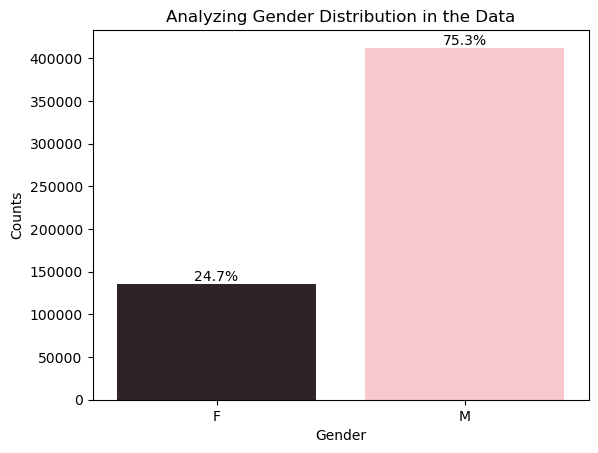

In [40]:
count = sns.countplot(data=df_2, x="Gender",hue="Gender", palette="dark:pink")

total= len(df_2)
for p in count.patches:
    height = p.get_height()
    percentage = f'{height/total*100:.1f}%'
    count.text(p.get_x()+ p.get_width()/2., height+0.5, percentage, ha='center', va="bottom")
    
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title ("Analyzing Gender Distribution in the Data")
plt.show()


Distribution of Age across the Dataset

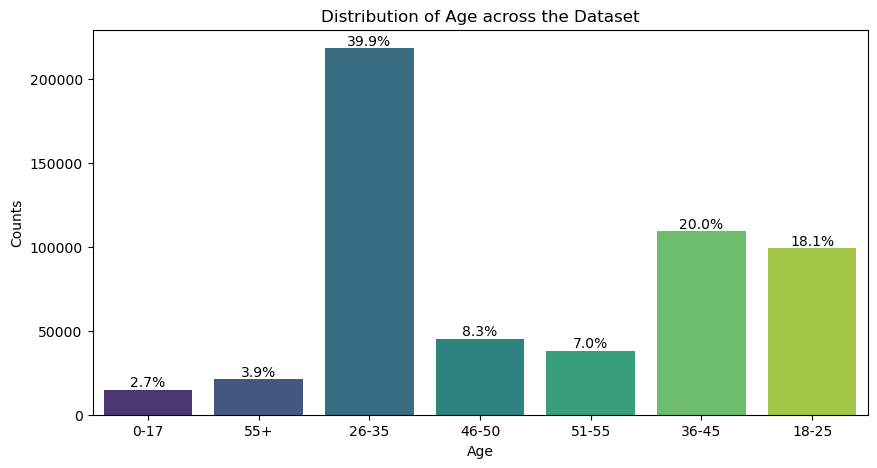

In [41]:
plt.figure(figsize=(10,5))
count = sns.countplot(data=df_2, x="Age", hue="Age", palette="viridis")

total= len(df_2)
for p in count.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    count.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Distribution of Age across the Dataset")

plt.show()

Average Purchase Amount by Occupation

C:\Users\Sanjeev\AppData\Local\Temp\ipykernel_4604\1961002758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=occupation_purchase_avg_df, x="Occupation", y="Purchase", palette="deep" )


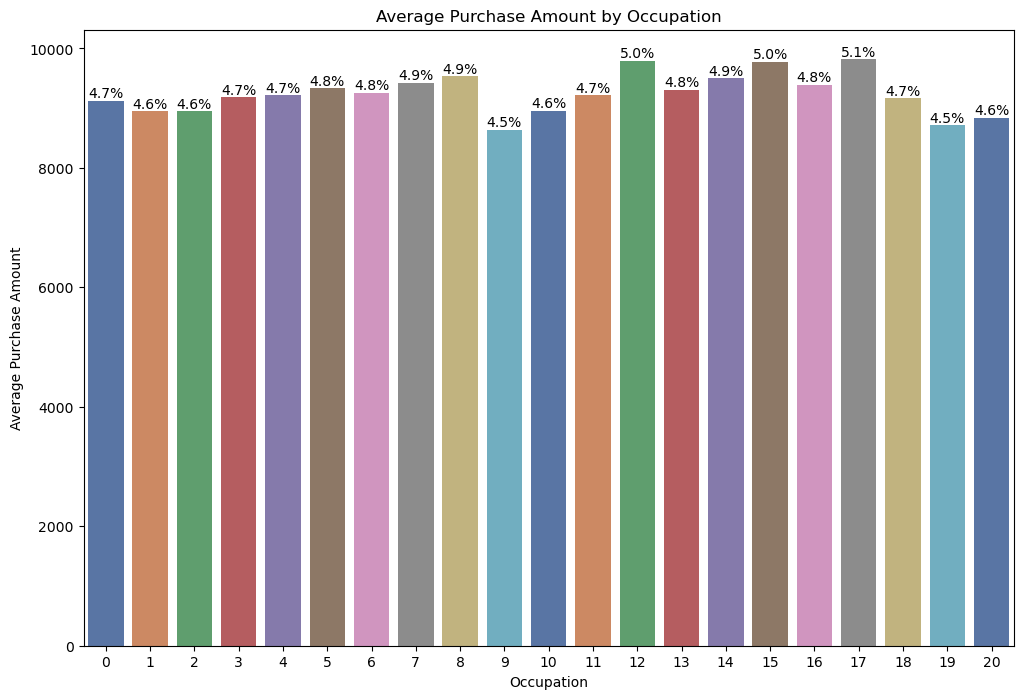

In [42]:
occupation_purchase_avg = df.groupby("Occupation")["Purchase"].mean()
occupation_purchase_avg_df = occupation_purchase_avg.reset_index()
occupation_purchase_avg_df.columns = ["Occupation", "Purchase"]

plt.figure(figsize=(12,8))
ax = sns.barplot(data=occupation_purchase_avg_df, x="Occupation", y="Purchase", palette="deep" )

total_average_purchase = occupation_purchase_avg_df["Purchase"].sum()

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100* height/total_average_purchase:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2, height+0.5, percentage, ha="center", va="bottom")
    
plt.xlabel("Occupation")
plt.ylabel("Average Purchase Amount")
plt.title("Average Purchase Amount by Occupation")

plt.show()


# Understanding the Relationship of Columns

In [43]:
df_2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Relationship Analysis: How Each Factor Affects Purchase Amount

<Axes: title={'center': 'Purchase'}, xlabel='Product_Category'>

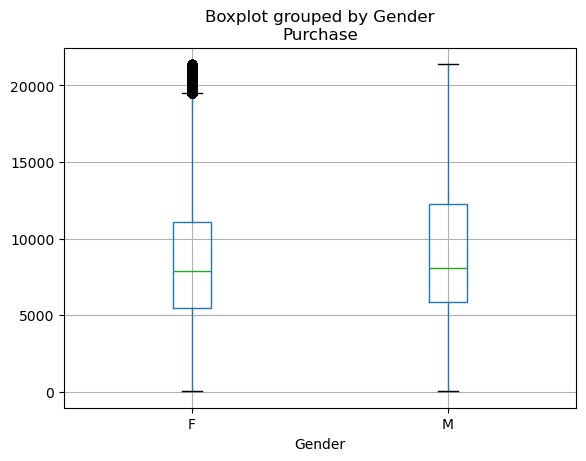

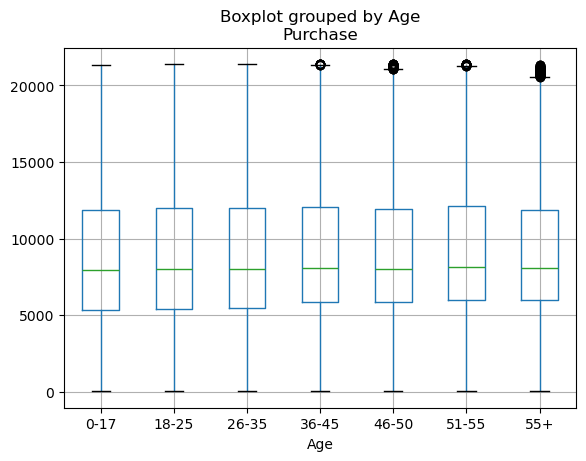

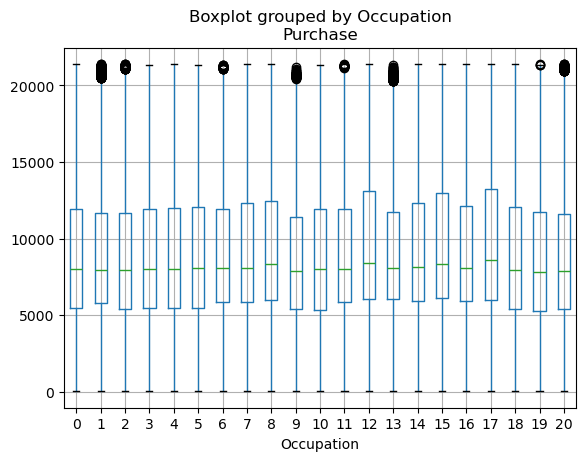

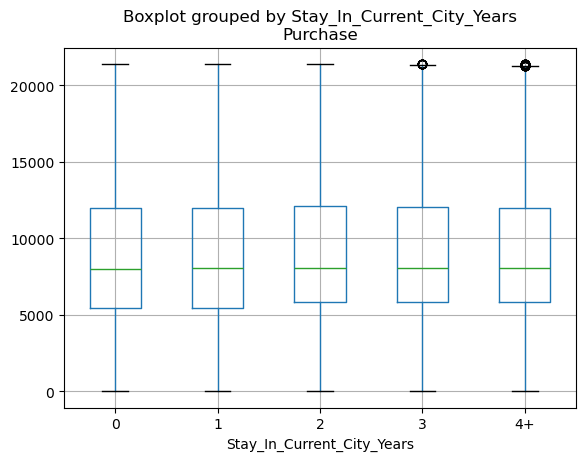

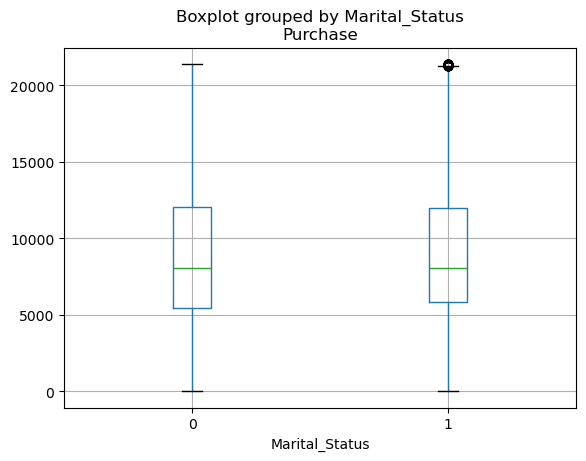

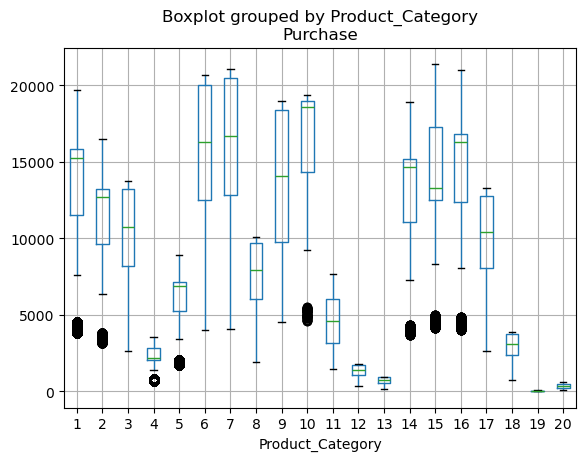

In [44]:
df_2.boxplot("Purchase", by = "Gender")
df_2.boxplot("Purchase", by = "Age")
df_2.boxplot("Purchase", by = "Occupation")
df_2.boxplot("Purchase", by = "Stay_In_Current_City_Years")
df_2.boxplot("Purchase", by = "Marital_Status")
df_2.boxplot("Purchase", by = "Product_Category")